# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [3]:
X_ = pd.read_csv('ref_X_train.csv')
X_test = pd.read_csv('ref_X_test.csv')
y_ = pd.read_csv("./train/y_train.txt", header= None,names=['ativ'])
y_test = pd.read_csv('./test/y_test.txt', header= None,names=['ativ'])


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=1)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [5]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [19]:
best_var = pd.DataFrame({'Variáveis':X_train.columns, 'Importância':dectree.feature_importances_})
best_var.sort_values(by='Importância', inplace=True, ascending=False)
best_var

,Variáveis,Importância
52,tGravityAcc-min()-X,0.284210
389,"fBodyAccJerk-bandsEnergy()-1,16",0.253601
41,tGravityAcc-mean()-Y,0.165821
504,fBodyAccMag-mad(),0.138588
74,"tGravityAcc-arCoeff()-Z,2",0.116278
...,...,...
185,"tBodyGyroJerk-arCoeff()-X,1",0.000000
184,tBodyGyroJerk-entropy()-Z,0.000000
183,tBodyGyroJerk-entropy()-Y,0.000000
182,tBodyGyroJerk-entropy()-X,0.000000


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [31]:
X_valid01 = X_valid[['tGravityAcc-min()-X','fBodyAccJerk-bandsEnergy()-1,16','tGravityAcc-mean()-Y']]
X_train01 = X_train[['tGravityAcc-min()-X','fBodyAccJerk-bandsEnergy()-1,16','tGravityAcc-mean()-Y']]
X_test01 = X_test[['tGravityAcc-min()-X','fBodyAccJerk-bandsEnergy()-1,16','tGravityAcc-mean()-Y']]
caminho = DecisionTreeClassifier(random_state=1).cost_complexity_pruning_path(X_valid01, y_valid)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_valid01, y_valid)
    clfs.append(clf)

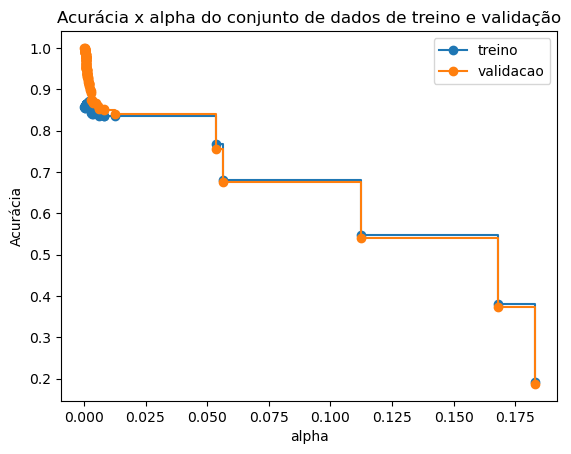

In [28]:
train_scores = [clf.score(X_train01, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid01, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validacao",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [29]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

Acurácia da melhor árvore na base de validação: 100.00


DecisionTreeClassifier(random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

C:\Users\dedaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


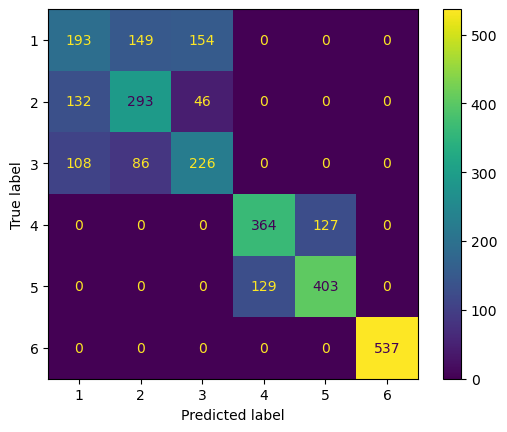

In [32]:
acuracia_teste = melhor_arvore.score(X_test01, y_test)

plot_confusion_matrix(melhor_arvore, X_test01, y_test);